In [1]:
TCanvas *c = new TCanvas("c", "canvas", 1000, 600); 
//пустое окно: название, заголовок, ширина, высота

# Равномерное распределение в интервале $(0,1)$

In [2]:
TH1D *h = new TH1D("h", "Uniform distribution", 100, 0, 1); 
//гистограмма: название, заголовок, число бинов, начало, конец

In [3]:
for(int i=0; i<1e6; i++){
    double r = gRandom->Rndm(); // равномерно распределённая случайная величина в интервале (0, 1)
    h->Fill(r); //добавить в гистограмму значение переменной r
}

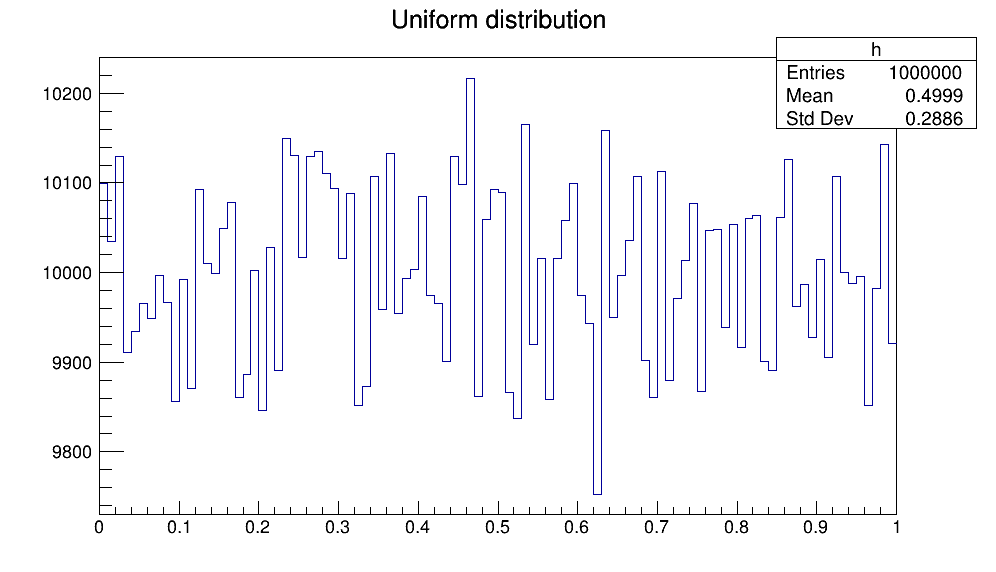

In [4]:
c->Draw(); //нарисовать окно
h->Draw(); //нарисовать гистограмму

<h1 style="color:red"> Задача #1 </h1>

## Равномерное распределение в интервале $(a, b)$

In [5]:
double a = 8, b = 18;
TH1D *h1 = new TH1D("h1", "Uniform", 100, a-1, b+1); //изменения здесь

In [6]:
for(int i=0; i<1e6; i++){
    double r = a + (b-a)*gRandom->Rndm(); //изменения здесь
    h1->Fill(r);
}

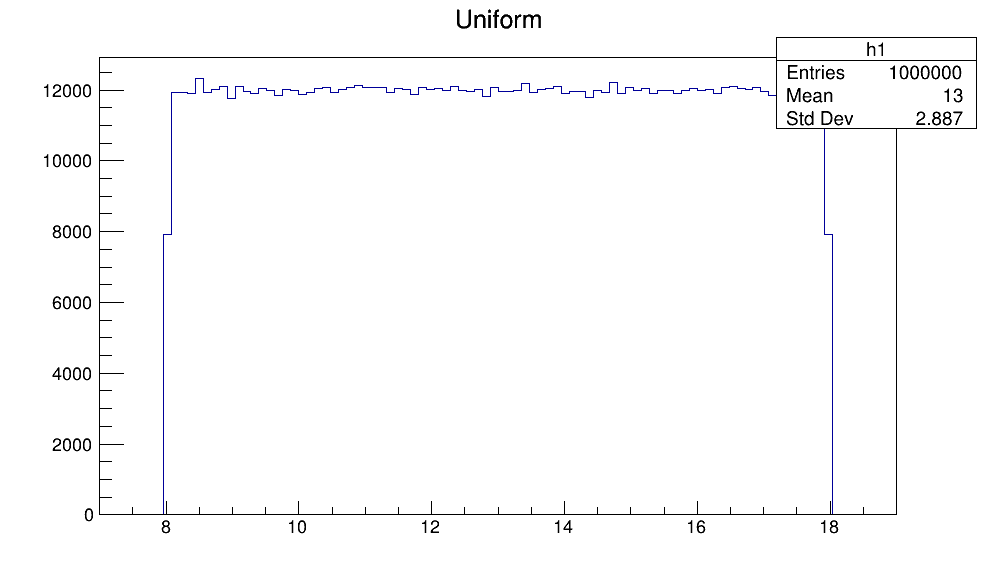

In [7]:
c->Draw();
h1->Draw();

-------

# Нормальное (гауссово) распределение

## 1. Центральная Предельная Теорема

<p style="text-align:center; font-size:20pt;"> $ x = \sum\limits_{i=1}^{12} r - 6$ </p>

$r$ — равномерно распределённая случайная величина в интервале $(0, 1)$

$x$ — нормально распределённая случайная величина с $\mu = 0$ и $\sigma = 1$

In [8]:
TH1D* h2 = new TH1D("h2", "Normal (CLT)", 100, -5, 5);
double x, r;

In [9]:
for(int i=0; i<1e6; i++){
    r = 0;
    for(int j=0; j<12; j++)
        r += gRandom->Rndm();
    x = r - 6;
    h2->Fill(x);
}

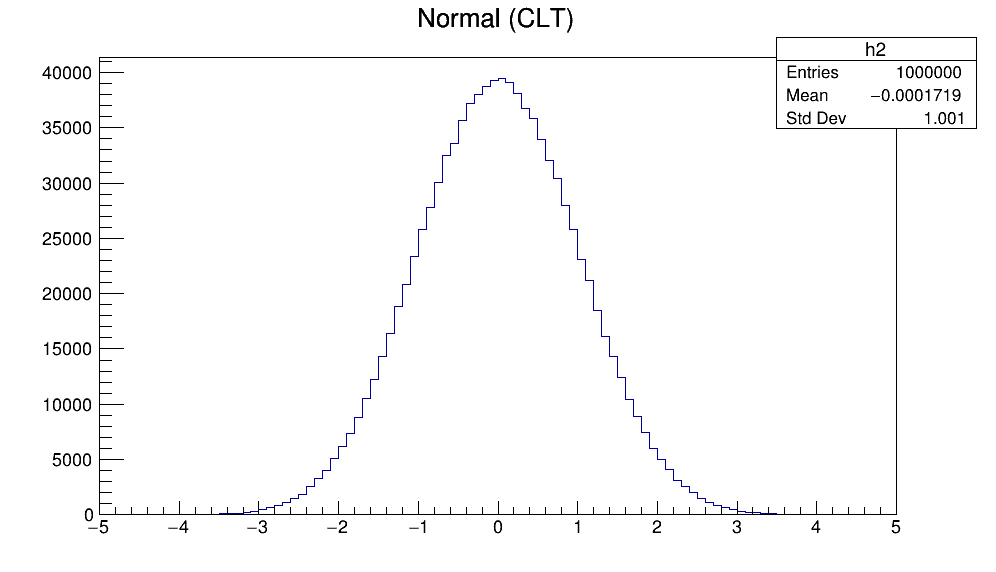

In [10]:
c->Draw();
h2->Draw();

## 2. [Метод Бокса — Мюллера](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%91%D0%BE%D0%BA%D1%81%D0%B0_%E2%80%94_%D0%9C%D1%8E%D0%BB%D0%BB%D0%B5%D1%80%D0%B0)

<p style="text-align:center; font-size:20pt;"> $ z_0 = \cos(2\pi r_0)\sqrt{-2\ln{r_1}}$ </p>
<p style="text-align:center; font-size:20pt;"> $ z_1 = \sin(2\pi r_0)\sqrt{-2\ln{r_1}}$ </p>

$r_0, r_1$ — равномерно распределённые случайные величины в интервале $(0, 1)$

$z_0, z_1$ — независимые нормально распределённые случайные величины с $\mu = 0$ и $\sigma = 1$

In [11]:
TH1D* h3 = new TH1D("h3", "Normal (Box-Muller)", 100, -5, 5);
double r0, r1;
double z0, z1;

In [12]:
for(int i=0; i<1e6; i++){
    r0 = gRandom->Rndm();
    r1 = gRandom->Rndm();
    
    z0 = cos(2*TMath::Pi()*r0)*sqrt(-2*log(r1));
    z1 = sin(2*TMath::Pi()*r0)*sqrt(-2*log(r1));
    
    h3->Fill(z0);
    h3->Fill(z1);
}

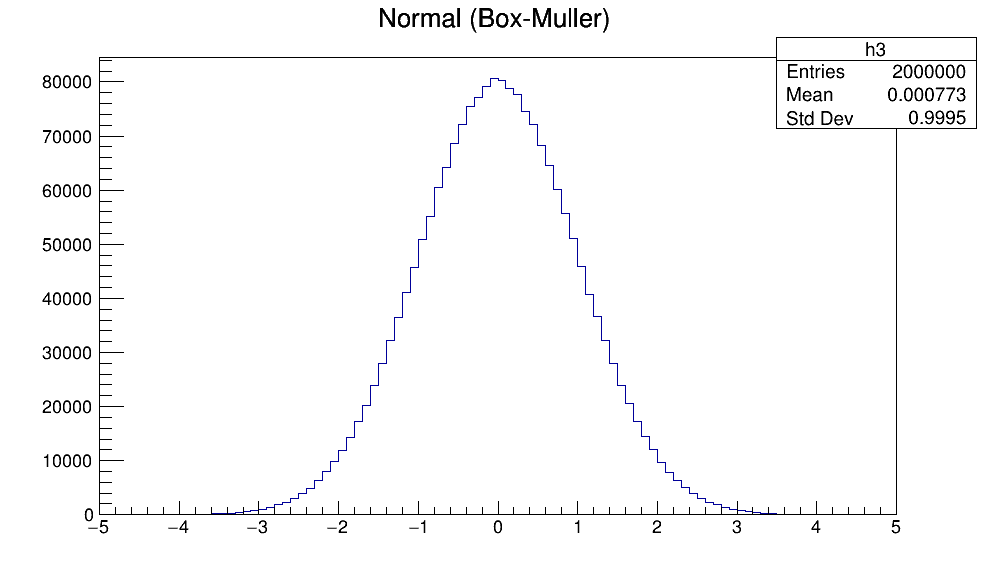

In [13]:
c->Draw();
h3->Draw();

<h1 style="color:red"> Задача #2 </h1>

## Получить нормальное распределение с мат.ожиданием $\mu = 50$ и дисперсией $\sigma = 12.5$



Hint: $y = \mu + \sigma x;\qquad x \in N(0, 1), \quad y \in N(\mu,\sigma);  $

------

# Моделирование распределения с заданной плотностью вероятности

## 1. [Метод обратной функции](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F)

пусть
$$ f(x) : x \in [a,b] $$
$$ \int_{a}^{b} f(x)\mathrm{d}x = 1 $$

тогда
<p style="text-align:center; font-size:20pt;">$$ \int_{a}^{\xi} f(x) \mathrm{d} x = r $$</p>
$r$ - равномерно распределённая случайная величина в интервале $(0, 1)$

т.о., решая это уравнение, получаем случайную величину $\xi$, распределённую согласно $f(x)$

<h3 style="font-size:16pt;">Пример</h3> 

Сгенерировать случайную величину согласно плотности распределения $f(x)\sim e^{-\lambda x}$ при $x \in [0, \infty)$

In [14]:
TH1D* hexp = new TH1D("hexp", "Expotential dist", 100, 0, 10);
double lambda, xi;

In [15]:
hexp->Reset();
lambda = 0.5;
for(int i=0; i<1e6; i++){
    r = gRandom->Rndm();
    xi = -log(1-r)/lambda;
    hexp->Fill(xi);
}

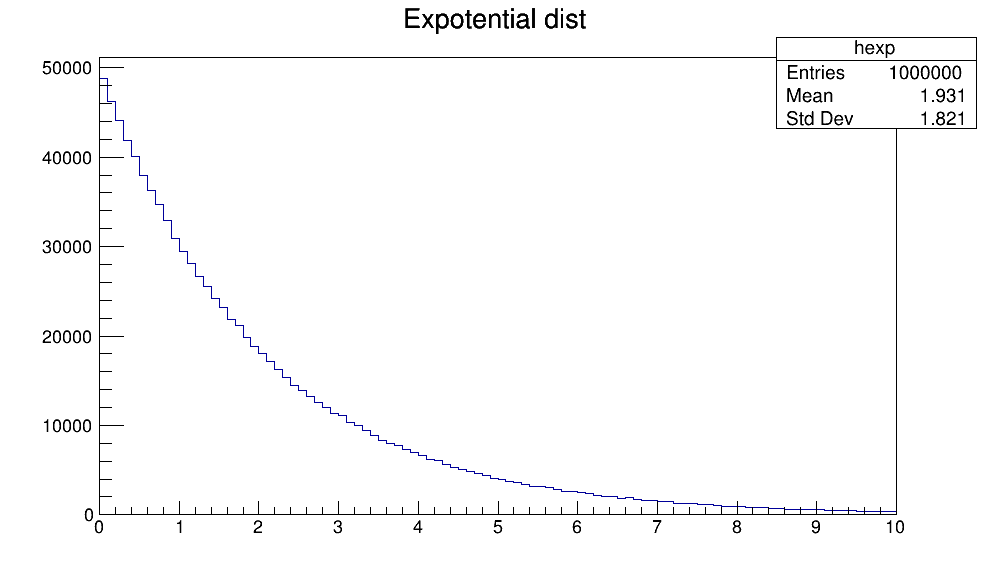

In [16]:
c->Draw();
hexp->Draw();

как проверить, что всё получилось правильно?

<h1 style="color:red"> Задача #3 </h1>

<h2>Получить распределение частиц по полярному углу, если известно $\frac{dN}{d\cos\theta} = 1 + \cos^2 \theta$ </h2>

In [17]:
TH1D* hpol = new TH1D("hpol", "Polar angle dist.", 100, 0, TMath::Pi());
TH1D* hcos = new TH1D("hcos", "Cosine of the polar angle dist.", 100, -1, 1);
double ang;

In [18]:
for(int i=0; i<1e6; i++){
    r = gRandom->Rndm();
    ang = pow(sqrt(16*r*r-16*r+5)+4*r-2, 1./3);
    hpol->Fill(acos(ang-1./ang));
    hcos->Fill(ang-1./ang);
}

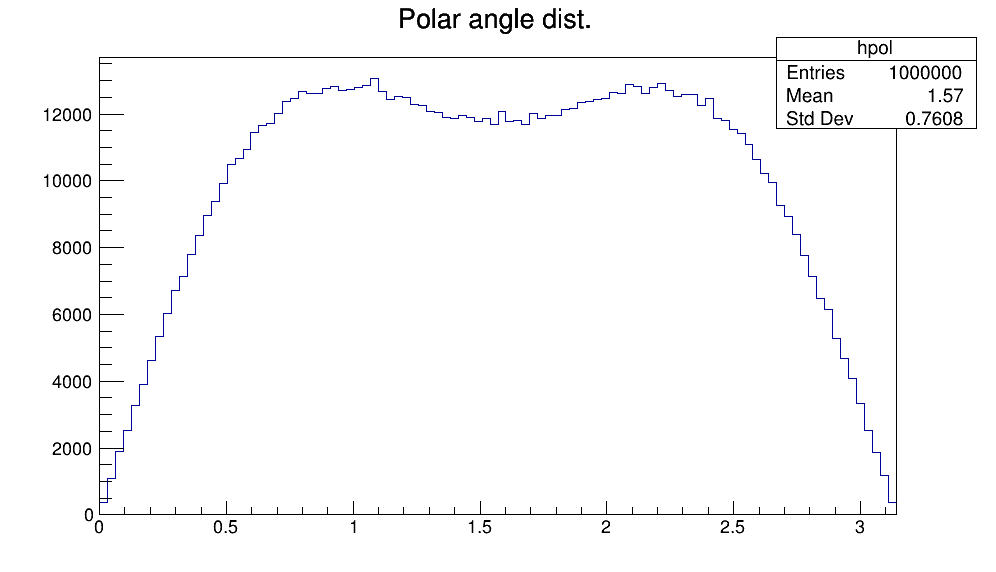

In [19]:
c->Draw();
hpol->Draw();

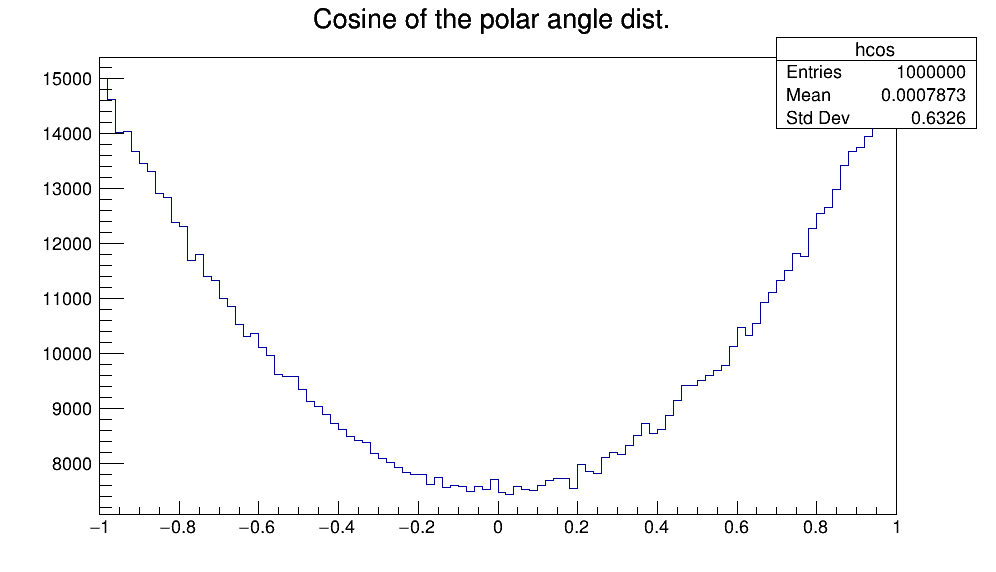

In [20]:
c->Draw();
hcos->Draw();

## 2. Метод Неймана

сгенерировать распределение из задачи #3 методом Неймана

In [21]:
TH1D* hneu = new TH1D("hneu", "Neumann", 100, 0, TMath::Pi());
double X, Y; //равномерно распределены

In [22]:
hneu->Reset();
for(int i=0; i<1e6; i++){
    X = TMath::Pi()*gRandom->Rndm();
    Y = 2*gRandom->Rndm();
    if(Y<(1+pow(cos(X),2))*sin(X))
        hneu->Fill(X);
}

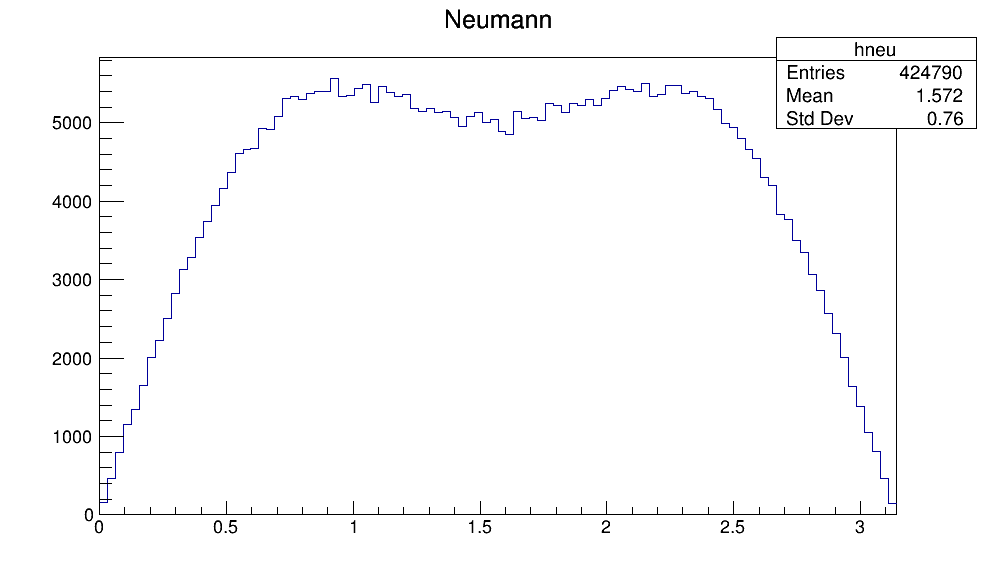

In [23]:
c->Draw();
hneu->Draw();

## 3. Метод главной части

1. Смоделировать распределение $f(x) = e^x$, $x \in [0,1]$ методом Неймана

In [24]:
TH1D* hn = new TH1D("hn", "Direct Neumann", 100, 0, 1);

In [25]:
hn->Reset();
for(int i=0; i<1e6; i++){
    X = gRandom->Rndm();
    Y = exp(1)*gRandom->Rndm();
    if(Y<exp(X) )
        hn->Fill(X);
}

2. Теперь выделим главную часть $g(x)$
$$g(x) = \frac{2}{3} (1+x)$$
её смоделируем методом обратной функции, а $G(x) = f(x)/g(x)$ - методом Неймана

In [26]:
TH1D* hm = new TH1D("hm", "Main part", 100, 0, 1);

In [27]:
hm->Reset();
for(int i=0; i<1e6; i++){
    X = -1 + sqrt(1 + 3*gRandom->Rndm());
    Y = 3*exp(1)*gRandom->Rndm()/4.;
    if(Y<3*exp(X)/(2*(1+X)))
        hm->Fill(X);
}

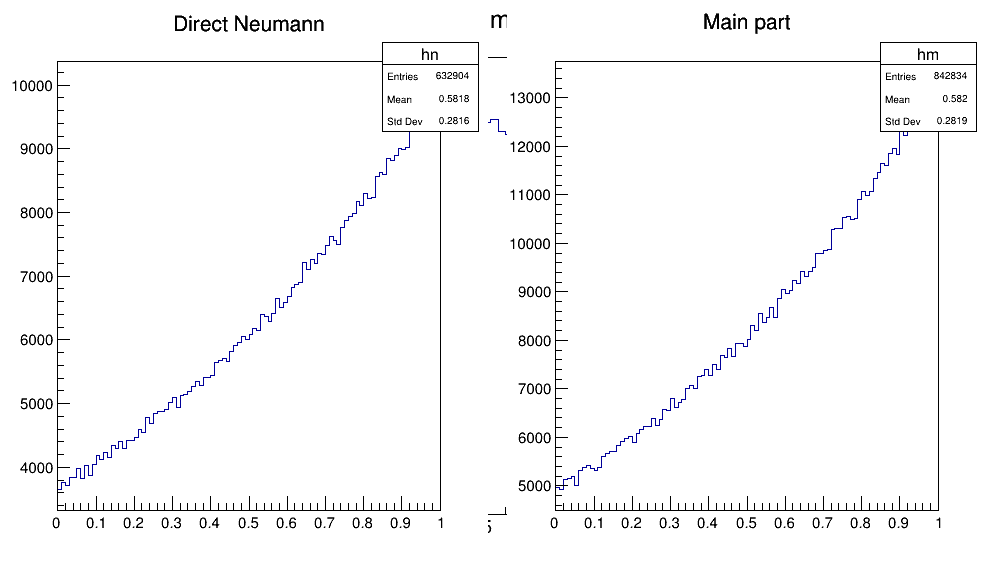

In [28]:
c->Divide(2, 1);
c->Draw();
c->cd(1);
hn->Draw();
c->cd(2);
hm->Draw();

метод выделения главной части значительно повысил эффективность